<a href="https://colab.research.google.com/github/vishnukbansal1908/Open-AI-training/blob/main/diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df[df.isnull()].count() # no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

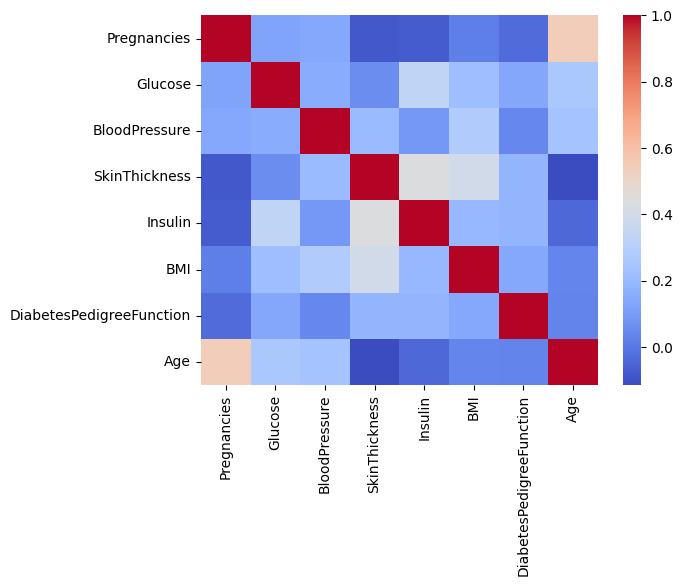

In [9]:
import seaborn as sns

all_col_names = list(df.columns) # we are selecting top 16 only to make our visualizations
# easier to look at!

all_col_names.remove('Outcome')

numbers_only = df.loc[:, all_col_names]


cors = numbers_only.corr()
cors

sns.heatmap(cors, cmap = 'coolwarm')

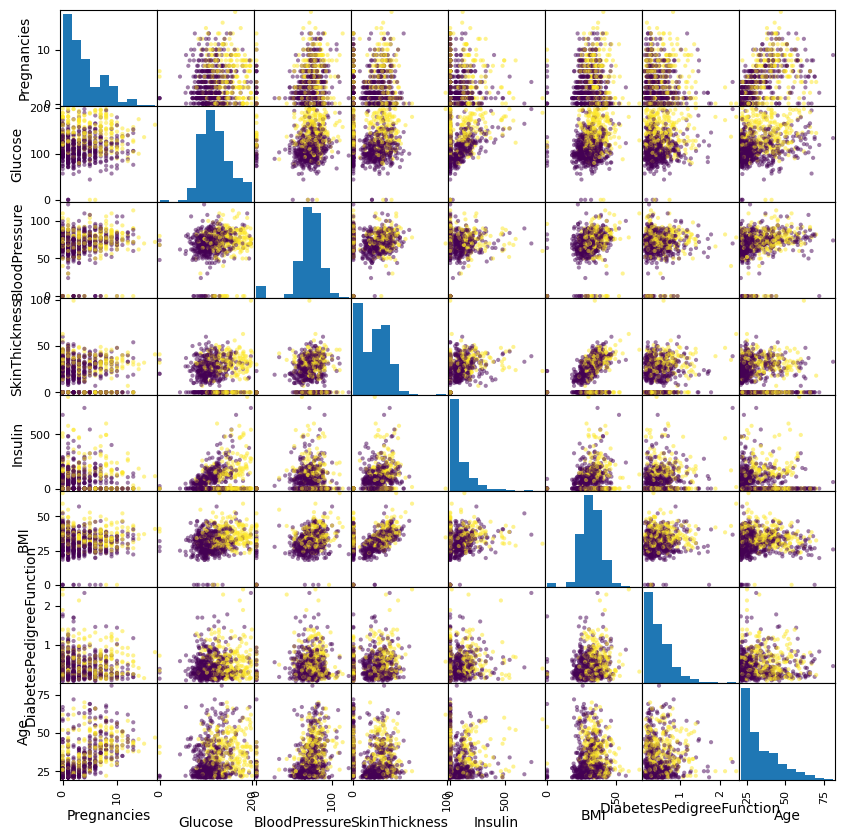

In [12]:
y = df['Outcome']
sm = pd.plotting.scatter_matrix(numbers_only, c=y, figsize=(10,10))

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numbers_only)
x = scaler.transform(numbers_only)
#df_normalized.shape
#y.shape


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(614, 8)
(614,)
(154, 8)
(154,)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [24]:
predictions = model.predict(xtest)
predictions

array([ 0.49936682, -0.0679816 ,  0.33360749,  0.23278305,  1.01542419,
        0.2089401 ,  0.49328457,  0.55583194,  0.08786106,  0.78532336,
        0.30210251,  0.47794905,  0.36347548,  0.03987242,  0.28203788,
        0.88029193,  0.12129698,  0.65163933,  0.37200822,  0.21038091,
        0.28004261,  0.62325676,  0.12283359,  0.37676995,  0.27087998,
        0.29901774,  0.15890463,  0.28149065,  0.36562724,  0.01369808,
        0.55627504,  0.25819496,  0.42365718,  0.015663  ,  0.83595913,
        0.37783731,  0.08222178,  0.28008984, -0.01517699,  0.21369876,
        0.67984838,  0.43179808,  0.6349282 ,  0.13888072,  0.5780788 ,
        0.00252757,  0.42437014,  0.15288081,  0.27637265, -0.25782336,
        0.63226792,  0.67193089,  0.40732911,  0.61017368,  0.23980011,
        0.73178061,  0.3832606 ,  0.80356561,  0.06913129, -0.18640789,
        0.41658405,  0.17771812,  0.25865724,  0.41207418,  0.57675045,
        0.30794264,  0.38150418,  0.80067945,  0.51719398,  0.81

In [26]:
threshold = ( predictions.max() + predictions.min()) / 2
binary_logic = lambda val: 1 if val > threshold else 0
p = [ binary_logic(prediction) for prediction in predictions]


154

In [27]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(p, ytest)
print(ascore*100)

64.28571428571429


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
}

from sklearn.metrics import accuracy_score
best_model_acc = None
best_model_name_acc = ""
best_acc = -1
all_accs = []

for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain, ytrain)
  p = model.predict(xtest)
  a_score = accuracy_score(p, ytest)


  all_accs.append(a_score)
  print('Accuracy = ' + str(a_score))

  if a_score > best_acc:
    best_acc = a_score
    best_model_acc = algo
    best_model_name_acc = algo_name
  print('*************')
  print()


Algorithm considered = DecisionTree100
Accuracy = 0.6428571428571429
*************

Algorithm considered = RandomForest10
Accuracy = 0.7012987012987013
*************

Algorithm considered = KNN
Accuracy = 0.7337662337662337
*************

Algorithm considered = Sherlock
Accuracy = 0.7532467532467533
*************

Algorithm considered = Support Vector Machine with linear
Accuracy = 0.8051948051948052
*************



In [31]:
best_model_name_acc

'Support Vector Machine with linear'